In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
import kagglehub

path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")
path += '\\Salary_dataset.csv'
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0'], axis=1)

In [12]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [16]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [19]:
df = df.sort_values(by='YearsExperience')

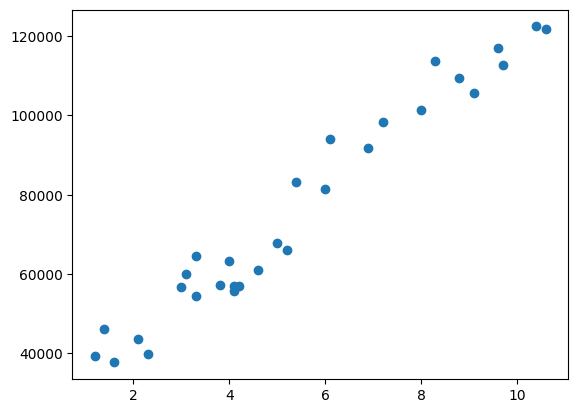

In [20]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.show()

In [31]:
X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9414466227178215

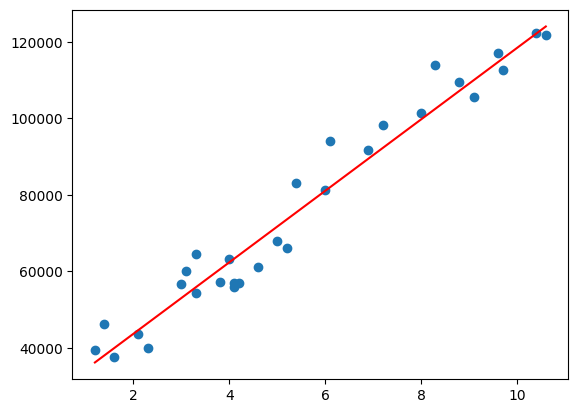

In [33]:
linear_predict = lr.predict(X)
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(df['YearsExperience'], linear_predict, color='red')
plt.show()

### Testando com regularização

In [34]:
ls = Lasso()
ls.fit(X_train, y_train)
ls.score(X_test, y_test)

0.9414451197525715

In [35]:
rd = Ridge()
rd.fit(X_train, y_train)
rd.score(X_test, y_test)

0.9407320040843781

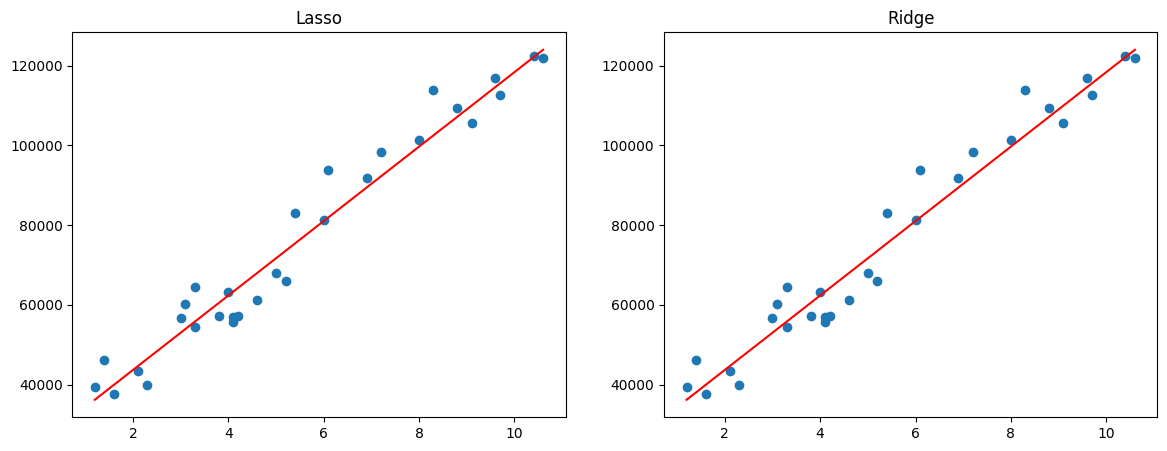

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

linear_predict = ls.predict(X)
ax1.scatter(df['YearsExperience'], df['Salary'])
ax1.plot(df['YearsExperience'], linear_predict, color='red')
ax1.set_title('Lasso')

linear_predict = ls.predict(X)
ax2.scatter(df['YearsExperience'], df['Salary'])
ax2.plot(df['YearsExperience'], linear_predict, color='red')
ax2.set_title('Ridge')

plt.show()